<a href="https://colab.research.google.com/github/Cuong22MSE23093/ArtificialIntelligence/blob/main/%5BAssignment_1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

Phân tích và dự báo giá cổ phiếu SHB (Ngân hàng Thương mại cổ phần Sài Gòn - Hà Nội) dựa trên dữ liệu giá 4 năm gần nhất.

Dữ liệu được lưu ở: https://www.kaggle.com/datasets/cuong22mse23093/shb-stock-price-history

#Import libraries

In [14]:
!pip install kaggle

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
import os
# Cấu hình secret key để xác thực truy cập đến Kaggle trên môi trường
os.environ['KAGGLE_USERNAME'] = 'cuong22mse23093'
os.environ['KAGGLE_KEY'] = '954bdde6f87f168ad1afce7b1a169ecc'

if not os.path.exists('./kaggle/train_data.csv'):
  !kaggle datasets download -d cuong22mse23093/shb-stock-price-history -p ./ # Download dữ liệu train từ Kaggle
  !unzip  ./*.zip -d ./kaggle
else:
    print('File already exists, no need to download or unzip.')

print(os.listdir('./kaggle'))

File already exists, no need to download or unzip.
['train_data.csv', 'test_data.csv']


In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# Using TensorFlow backend
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#Reading CSV Files
Có tổng cộng 2 files: train_data và test_data

Date: Ngày giao dịch

Open: Giá mở cửa

High: Giá cao nhất

Low: Giá thấp nhất

Close: Giá đóng cửa

Volume: Khối lượng giao dịch


In [18]:
# Train data
dataset_train = pd.read_csv("./kaggle/train_data.csv")
dataset_train = dataset_train.replace(',','', regex=True)
dataset_train = dataset_train.astype({'Open':'float','High':'float', 'Low':'float','Close':'float', 'Volume':'float'})

# Test data
dataset_test =pd.read_csv("./kaggle/test_data.csv")
dataset_test = dataset_test.replace(',','', regex=True)
dataset_test = dataset_test.astype({'Open':'float', 'High':'float', 'Low':'float', 'Close':'float', 'Volume':'float'})

#EDA

In [19]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,31/03/2023,8983.05,9110.17,8940.68,9110.17,45228278.0
1,30/03/2023,9194.92,9194.92,8983.05,8983.05,67383521.0
2,29/03/2023,9194.92,9194.92,9025.42,9152.54,27690300.0
3,28/03/2023,9067.80,9194.92,8983.05,9194.92,37441600.0
4,27/03/2023,8898.31,9067.80,8813.56,9025.42,36925000.0
...,...,...,...,...,...,...
887,10/09/2019,2764.27,2808.85,2719.68,2764.27,5532790.0
888,09/09/2019,2764.27,2764.27,2719.68,2764.27,4150200.0
889,06/09/2019,2808.85,2808.85,2719.68,2764.27,1457100.0
890,05/09/2019,2808.85,2808.85,2764.27,2764.27,1230000.0


In [20]:
# Lấy giá mở cửa
trainset = dataset_train.iloc[:,1:2].values

In [21]:
trainset

array([[ 8983.05],
       [ 9194.92],
       [ 9194.92],
       [ 9067.8 ],
       [ 8898.31],
       [ 8983.05],
       [ 8516.95],
       [ 8644.07],
       [ 8559.32],
       [ 8644.07],
       [ 8644.07],
       [ 8601.69],
       [ 8644.07],
       [ 8423.73],
       [ 8432.2 ],
       [ 8644.07],
       [ 8559.32],
       [ 8330.51],
       [ 8466.1 ],
       [ 8398.31],
       [ 8457.63],
       [ 8516.95],
       [ 8305.08],
       [ 8355.93],
       [ 8305.08],
       [ 8601.69],
       [ 8516.95],
       [ 8644.07],
       [ 8983.05],
       [ 8559.32],
       [ 8559.32],
       [ 8559.32],
       [ 8381.36],
       [ 8381.36],
       [ 8516.95],
       [ 8601.69],
       [ 8644.07],
       [ 8644.07],
       [ 8898.31],
       [ 8855.93],
       [ 8898.31],
       [ 8983.05],
       [ 9406.78],
       [ 9152.54],
       [ 9491.53],
       [ 9618.64],
       [ 9406.78],
       [ 9449.15],
       [ 9152.54],
       [ 9110.17],
       [ 8983.05],
       [ 9025.42],
       [ 898

In [9]:
trainset.shape

(892, 1)

In [10]:
# Chuẩn hoá dữ liệu theo khoảng giá trị từ 0 đến 1.
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [11]:
training_scaled

array([[0.36766384],
       [0.37992617],
       [0.37992617],
       [0.37256889],
       [0.36275937],
       [0.36766384],
       [0.34068753],
       [0.34804481],
       [0.34313976],
       [0.34804481],
       [0.34804481],
       [0.345592  ],
       [0.34804481],
       [0.33529227],
       [0.33578248],
       [0.34804481],
       [0.34313976],
       [0.329897  ],
       [0.3377445 ],
       [0.33382104],
       [0.33725428],
       [0.34068753],
       [0.3284252 ],
       [0.33136823],
       [0.3284252 ],
       [0.345592  ],
       [0.34068753],
       [0.34804481],
       [0.36766384],
       [0.34313976],
       [0.34313976],
       [0.34313976],
       [0.33284003],
       [0.33284003],
       [0.34068753],
       [0.345592  ],
       [0.34804481],
       [0.34804481],
       [0.36275937],
       [0.36030656],
       [0.36275937],
       [0.36766384],
       [0.39218792],
       [0.37747336],
       [0.39709297],
       [0.40444967],
       [0.39218792],
       [0.394

In [12]:
# Chuẩn bị dữ liệu huấn luyện
# x_train sẽ lưu các mẫu dữ liệu đầu vào và y_train sẽ lưu các mẫu dữ liệu đầu ra
x_train = []
y_train = []

# Chọn 60 là độ dài tích luỹ 1 chuỗi dự đoán
for i in range(60,892):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [13]:
x_train.shape

(832, 60)

In [23]:
# Đổi thành mảng 3 chiều
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [24]:
# Thêm LSTM với 50 unit
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [25]:
# Thêm Dropout 20% để ngăn overfitting
regressor.add(Dropout(0.2))

In [26]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [27]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [28]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [29]:
# Thêm một lớp fully connected với 1 đơn vị đầu ra. Đây là lớp cuối cùng của mạng và sẽ cho ra dự đoán.
regressor.add(Dense(units = 1))

In [31]:
# Chọn hàm optimizer = adam, hàm loss = mean_squared_error
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [32]:
# Train data với 100 epochs, 32 batch size
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
26/26 [==============================] - 13s 146ms/step - loss: 0.0581
Epoch 2/100
26/26 [==============================] - 3s 113ms/step - loss: 0.0116
Epoch 3/100
26/26 [==============================] - 3s 105ms/step - loss: 0.0097
Epoch 4/100
26/26 [==============================] - 3s 114ms/step - loss: 0.0083
Epoch 5/100
26/26 [==============================] - 4s 139ms/step - loss: 0.0071
Epoch 6/100
26/26 [==============================] - 3s 105ms/step - loss: 0.0069
Epoch 7/100
26/26 [==============================] - 3s 104ms/step - loss: 0.0064
Epoch 8/100
26/26 [==============================] - 3s 107ms/step - loss: 0.0062
Epoch 9/100
26/26 [==============================] - 5s 176ms/step - loss: 0.0062
Epoch 10/100
26/26 [==============================] - 3s 107ms/step - loss: 0.0061
Epoch 11/100
26/26 [==============================] - 3s 104ms/step - loss: 0.0066
Epoch 12/100
26/26 [==============================] - 3s 104ms/step - loss: 0.0079
Epoch 13/100

In [33]:
# Tạo mảng lưu giá cổ phiếu thực tế của tập data_test
real_stock_price = dataset_test.iloc[:,1:2].values

In [34]:
# Tạo mảng lưu toàn bộ giá mở cửa từ data_train và data_test
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0      8983.05
1      9194.92
2      9194.92
3      9067.80
4      8898.31
        ...   
103    9618.64
104    9872.88
105    9661.02
106    9491.53
107    9194.92
Name: Open, Length: 1000, dtype: float64

In [36]:
# Lấy một khoảng thời gian trước khi thời điểm bắt đầu của tập kiểm tra để sử dụng làm dữ liệu đầu vào cho dự đoán.
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 2853.44,  2853.44,  2898.02,  2942.61,  2942.61,  2898.02,
        2987.19,  2942.61,  2987.19,  2987.19,  2987.19,  3031.78,
        3031.78,  2987.19,  2987.19,  2987.19,  2942.61,  2942.61,
        2987.19,  2942.61,  3031.78,  2942.61,  2898.02,  2898.02,
        2942.61,  2898.02,  2942.61,  2987.19,  2987.19,  2987.19,
        2987.19,  2942.61,  2942.61,  2942.61,  2898.02,  2898.02,
        2942.61,  2942.61,  2898.02,  2942.61,  2942.61,  2942.61,
        2942.61,  2898.02,  2898.02,  2942.61,  2898.02,  2942.61,
        2808.85,  2853.44,  2853.44,  2808.85,  2764.27,  2719.68,
        2719.68,  2764.27,  2764.27,  2808.85,  2808.85,  2808.85,
       12650.  , 12500.  , 12350.  , 12250.  , 12150.  , 12000.  ,
       12100.  , 12000.  , 12200.  , 12200.  , 11900.  , 12850.  ,
       12950.  , 12950.  , 12950.  , 13000.  , 12950.  , 13150.  ,
       13200.  , 13550.  , 13300.  , 12700.  , 12700.  , 12550.  ,
       12600.  , 12600.  , 12450.  , 12600.  , 12650.  , 12700

In [37]:
# Chuyển thành mảng 2D vì các hàm của MinMaxScaler yêu cầu dữ liệu có dạng 2D
inputs = inputs.reshape(-1,1)

In [38]:
inputs

array([[ 2853.44],
       [ 2853.44],
       [ 2898.02],
       [ 2942.61],
       [ 2942.61],
       [ 2898.02],
       [ 2987.19],
       [ 2942.61],
       [ 2987.19],
       [ 2987.19],
       [ 2987.19],
       [ 3031.78],
       [ 3031.78],
       [ 2987.19],
       [ 2987.19],
       [ 2987.19],
       [ 2942.61],
       [ 2942.61],
       [ 2987.19],
       [ 2942.61],
       [ 3031.78],
       [ 2942.61],
       [ 2898.02],
       [ 2898.02],
       [ 2942.61],
       [ 2898.02],
       [ 2942.61],
       [ 2987.19],
       [ 2987.19],
       [ 2987.19],
       [ 2987.19],
       [ 2942.61],
       [ 2942.61],
       [ 2942.61],
       [ 2898.02],
       [ 2898.02],
       [ 2942.61],
       [ 2942.61],
       [ 2898.02],
       [ 2942.61],
       [ 2942.61],
       [ 2942.61],
       [ 2942.61],
       [ 2898.02],
       [ 2898.02],
       [ 2942.61],
       [ 2898.02],
       [ 2942.61],
       [ 2808.85],
       [ 2853.44],
       [ 2853.44],
       [ 2808.85],
       [ 276

In [39]:
# Chuẩn hoá dữ liệu kiểm tra cho cùng phạm vi giá trị với tập huấn luyện
inputs = sc.transform(inputs)
inputs.shape

(168, 1)

In [40]:
# Tạo mảng chứa các dữ liệu đầu vào đã được chuẩn hóa để đưa vào mô hình dự đoán chuỗi thời gian.
x_test = []
for i in range(60,168):
    x_test.append(inputs[i-60:i,0])

In [41]:
x_test = np.array(x_test)
x_test.shape

(108, 60)

In [42]:
# Chuyển thành dạng 3D cho phù hợp mạng LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(108, 60, 1)

# Prediction

In [43]:
# Sử dụng regressor để dự đoán chuỗi thời gian
predicted_price = regressor.predict(x_test)

4/4 [==============================] - 2s 49ms/step


In [44]:
# Đưa các giá trị về phạm vi ban đầu
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[ 2627.117 ],
       [ 3588.8884],
       [ 6019.0864],
       [ 9164.847 ],
       [11495.718 ],
       [12365.533 ],
       [12227.806 ],
       [11767.629 ],
       [11378.457 ],
       [11261.092 ],
       [11406.558 ],
       [11639.429 ],
       [12032.294 ],
       [12503.228 ],
       [12895.2295],
       [13117.25  ],
       [13188.792 ],
       [13158.076 ],
       [13128.496 ],
       [13137.9795],
       [13243.794 ],
       [13334.088 ],
       [13235.836 ],
       [13021.37  ],
       [12783.793 ],
       [12615.537 ],
       [12541.702 ],
       [12507.894 ],
       [12513.9375],
       [12547.986 ],
       [12591.533 ],
       [12600.039 ],
       [12484.026 ],
       [12259.609 ],
       [12050.972 ],
       [11869.828 ],
       [11723.229 ],
       [11641.291 ],
       [11596.099 ],
       [11546.024 ],
       [11489.395 ],
       [11438.409 ],
       [11332.614 ],
       [11195.452 ],
       [11110.429 ],
       [11049.04  ],
       [10918.015 ],
       [10750

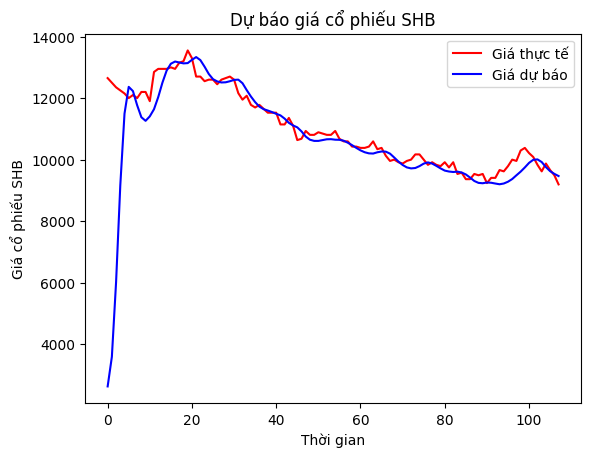

In [45]:
# Visualization
plt.plot(real_stock_price,color = 'red', label = 'Giá thực tế')
plt.plot(predicted_price, color = 'blue', label = 'Giá dự báo')
plt.title('Dự báo giá cổ phiếu SHB')
plt.xlabel('Thời gian')
plt.ylabel('Giá cổ phiếu SHB')
plt.legend()
plt.show()